### Machine Learning Lab04 Exercise: California Housing Analysis

Please use the real world dataset, **California housing price**, for model training and evaluate the model’s prediction performance. You can use simple linear regression, polynomial regression or more complicated base functions such as Gaussian function or use regularization methods. Make sure at least **20% data for testing** and choose one evaluation method you think good. **Please do not just train your model and say that is good enough, you need to give your analysis**. For that end, validation or cross validation is needed. Compare the score in the training set and the validation set. If they are both good enough, then use the model on the test set.

**Your test set can only be used for final evaluation!**

#### Import dataset

In [14]:
import numpy as np
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing(as_frame=True)
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [15]:
print(dataset.frame.head())
X = dataset.data
Y = dataset.target

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


#### Split Training and Testing Set

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
print("Train size: ", X_train.shape[0])
print("Test size: ", X_test.shape[0])

Train size:  16512
Test size:  4128


#### Linear Regression Model

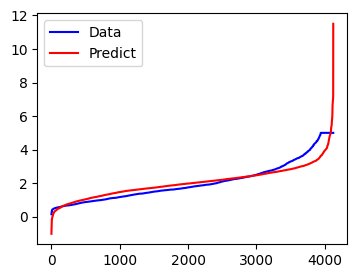

In [17]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(4,3))
plt.plot(range(len(y_test)),sorted(y_test),c='b',label='Data')
plt.plot(range(len(y_pred)),sorted(y_pred),c='r',label='Predict')
plt.legend()
plt.show()

#### Evaluate Model

In [18]:
from sklearn.metrics import mean_squared_error

print("MSE of LR: ", mean_squared_error(y_test, y_pred))
print("R^2 of LR: ", model.score(X_test, y_test))

MSE of LR:  0.555891598695244
R^2 of LR:  0.5757877060324511


#### Gaussian Basis Functions

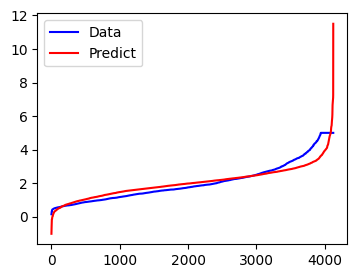

In [24]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

degree = 1  # Adjust the degree as needed
alpha = 0.01  # Regularization strength

model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), Ridge(alpha=alpha))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(4,3))
plt.plot(range(len(y_test)),sorted(y_test),c='b',label='Data')
plt.plot(range(len(y_pred)),sorted(y_pred),c='r',label='Predict')
plt.legend()
plt.show()

### 4.3 Questions
1) Describe another real-world application where the regression method can be applied
2) What are the strengths of the linear/polynomial regression methods; when do they perform well?
3) What are the weaknesses of the linear/polynomial regression methods; when do they perform poorly?
4) What makes the linear regression method a good candidate for the regression problem, if you have enough knowledge about the data?

1) **Real-World Application of Regression**:
   Regression methods find applications in various fields. One example is in **Financial Forecasting**, where you can use regression to predict stock prices or financial metrics. By analyzing historical data and relevant features (such as economic indicators, company performance, or market sentiment), you can build regression models to make forecasts about future stock prices or financial trends. These models can help investors make informed decisions about buying or selling stocks.

2) **Strengths of Linear/Polynomial Regression**:
   - **Interpretability**: Linear regression is straightforward to interpret. You can easily understand the relationship between the independent and dependent variables in terms of coefficients.
   - **Simplicity**: Linear and polynomial regression are simple and computationally efficient, making them suitable for quick modeling and analysis.
   - **Good for Simple Relationships**: They perform well when the relationship between the dependent and independent variables is approximately linear or can be approximated by a polynomial.
   - **Baseline Model**: Linear regression often serves as a good baseline model for more complex algorithms, allowing you to assess the value of adding complexity.

3) **Weaknesses of Linear/Polynomial Regression**:
   - **Assumption of Linearity**: Linear regression assumes that the relationship between the variables is linear, which may not hold in many real-world scenarios.
   - **Overfitting in High-Degree Polynomials**: Polynomial regression can overfit the data when using high-degree polynomials, leading to poor generalization.
   - **Limited Expressiveness**: Linear regression may not capture complex, nonlinear relationships that exist in some datasets.
   - **Sensitivity to Outliers**: Linear regression can be sensitive to outliers, which can significantly impact the model's performance.

4) **When Linear Regression Is a Good Candidate**:
   Linear regression is a good candidate for a regression problem when you have enough knowledge about the data and when the relationship between the dependent variable (target) and the independent variables (features) is reasonably linear. Key considerations include:
   - **Linearity Assumption**: If you have a clear understanding or evidence that the relationship between the variables is linear, linear regression is a good choice.
   - **Interpretability**: When interpretability is essential, linear regression provides easily interpretable coefficients that can be explained in the context of the problem.
   - **Quick Prototyping**: Linear regression is a fast way to prototype a regression model and understand the data's behavior.
   - **Baseline Model**: It serves as a baseline to compare with more complex models, helping to assess whether added complexity is justified.
   
   It's important to note that linear regression may not be suitable for all scenarios, especially when the relationship is highly nonlinear or when more complex models are needed to capture the underlying patterns in the data. In such cases, other regression methods, like polynomial regression, decision trees, or neural networks, may be more appropriate.